In [1]:
# Download data

from pathlib import Path
from torchvision import datasets
from torchvision.transforms import ToTensor

data_path = Path('data/')
mnist_data_path = data_path / "MNIST"

download_mnist = True

if mnist_data_path.is_dir():
    print('MNIST data already exists. Skipping download...')
    download_mnist = False
else:
    print('MNIST data folder not found. Downloading MNIST....')
    download_mnist = True



train_data = datasets.MNIST(
    root="data",
    train=True,
    download=download_mnist,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=download_mnist,
    transform=ToTensor()
)

MNIST data already exists. Skipping download...


In [2]:
img, label = train_data[0]

In [3]:
label

5

In [4]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [5]:
img.shape

torch.Size([1, 28, 28])

In [6]:
# Sample info
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [8]:
from torch.utils.data import Dataset
isinstance(train_data, Dataset)

True

In [9]:
class_names = train_data.classes

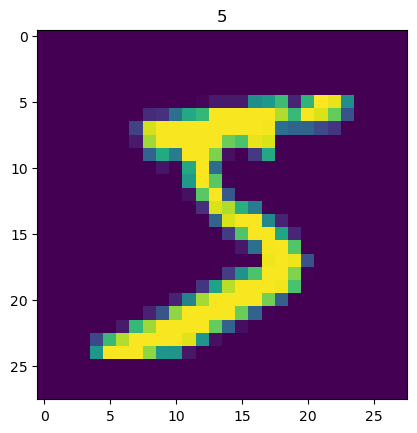

In [10]:
# Visualizing the data
import matplotlib.pyplot as plt
img, label = train_data[0]

plt.imshow(img.squeeze())
plt.title(label);

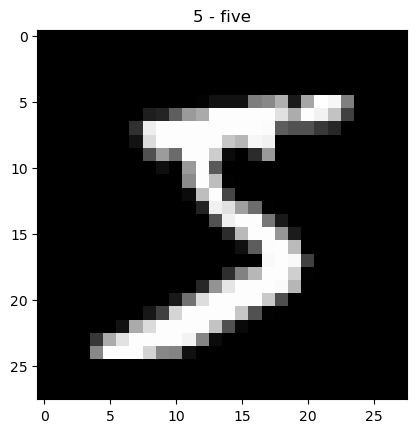

In [11]:
# Grayscale version
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label]);

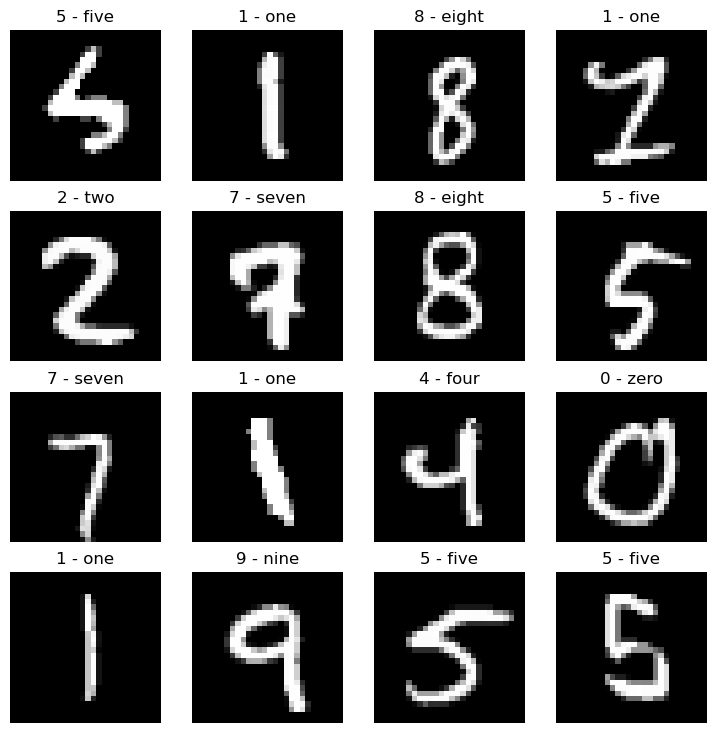

In [12]:
# Plot more images
import torch
torch.manual_seed(13)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
# DataLoader
from torch.utils.data import DataLoader

# Setup the batch size (Hyperparameter)
BATCH_SIZE = 32

# Turn datasets into batches (iterable)
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f'Train data loader {train_dataloader}')
print(f'Test data loader {test_dataloader}')

Train data loader <torch.utils.data.dataloader.DataLoader object at 0x16ab16850>
Test data loader <torch.utils.data.dataloader.DataLoader object at 0x16ac15e90>


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label 8, label size: torch.Size([])


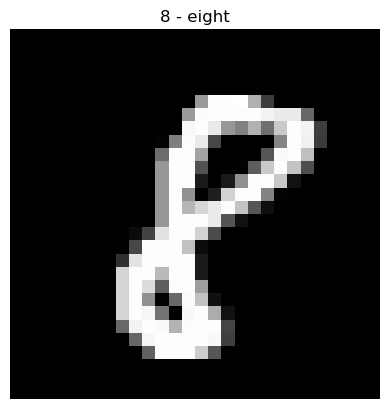

In [16]:
# Visualize one sample
torch.manual_seed(13)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")

print(f"Image size: {img.shape}")
print(f"Label {label}, label size: {label.shape}")

In [17]:
# Experimentation for baseline
from torch import nn

# Create a flatten layer
flatten_model = nn.Flatten()

# Single image
x = train_features_batch[0]

# Flatten the image
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
flatten_model(torch.randn((3, 4, 2))).shape

torch.Size([3, 8])

In [19]:
# V0 for MNIST model
from torch import nn

class MNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
# Instantiate V0
torch.manual_seed(13)

model_0 = MNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to('cpu')

MNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
# Timing our experiments
from timeit import default_timer as timer

def print_train_time(start, end, device=None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [23]:
# !pip install tqdm

In [24]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

torch.manual_seed(13)
train_time_start_on_cpu = timer()

epochs = 3

# Training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n {'-' * 100}")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        # Training
        model_0.train()

        # 1.Forward pass
        y_pred = model_0(X)

        # 2.Calculate loss (per batch)
        loss = loss_fn(y_pred, y)

        # 3.Optimizer zero grad
        optimizer.zero_grad()

        # 4.Loss backward
        loss.backward()

        # 5.Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)


    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1.Forward pass
            test_pred = model_0(X)

            # 2.Calculate loss (accumulate)
            test_loss += loss_fn(test_pred, y)

            # 3.Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)

/Users/shreyashkumar/anaconda3/envs/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:01<00:03,  1.62s/it]


Train loss: 0.00000 | Test loss: 0.31293, Test acc: 91.17%

Epoch: 1
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.60s/it]


Train loss: 0.00000 | Test loss: 0.30413, Test acc: 91.18%

Epoch: 2
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:04<00:00,  1.60s/it]


Train loss: 0.00000 | Test loss: 0.28565, Test acc: 91.79%

Train time on cpu: 4.823 seconds


In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
torch.manual_seed(13)

def eval_model(
    model,
    data_loader,
    loss_fn,
    accuracy_fn
):
    loss, acc = 0, 0
    model.eval()

    for X, y in data_loader:
        # Make predictions
        y_pred = model(X)

        # Accumulate the loss and accuracy per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [27]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.28564971685409546,
 'model_acc': 91.79313099041534}

In [28]:
# Device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [29]:
# V1 MNIST - Mix of linear and non-linear layers

class MNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [30]:
torch.manual_seed(13)

model_1 = MNISTModelV1(
    input_shape=28*28, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available

next(model_1.parameters()).device # check model device

device(type='cpu')

In [31]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_1.parameters(), 
    lr=0.1
)

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [33]:
torch.manual_seed(13)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


 33%|███▎      | 1/3 [00:01<00:03,  1.69s/it]

Train loss: 0.85432 | Train accuracy: 69.84%
Test loss: 0.72263 | Test accuracy: 73.01%

Epoch: 1
---------


 67%|██████▋   | 2/3 [00:03<00:01,  1.70s/it]

Train loss: 0.64098 | Train accuracy: 76.98%
Test loss: 0.51245 | Test accuracy: 81.74%

Epoch: 2
---------


100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

Train loss: 0.50949 | Train accuracy: 82.08%
Test loss: 0.49650 | Test accuracy: 82.26%

Train time on cpu: 5.021 seconds


In [34]:
# Move values to device
torch.manual_seed(13)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.4964990019798279,
 'model_acc': 82.25838658146965}

In [35]:
# V2 of MNIST - Integrating a CNN (architecture) from CNN explainer (poloclub)

class MNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x


torch.manual_seed(13)
model_2 = MNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_2

MNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
from torchinfo import summary

summary(model_2)

Layer (type:depth-idx)                   Param #
MNISTModelV2                             --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0

In [37]:
torch.manual_seed(13)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 4.3716e-01,  3.7006e-01,  1.5816e+00,  ...,  1.4596e+00,
           1.0305e+00,  8.7925e-01],
         [ 3.2857e-01, -7.4203e-02,  1.4140e-01,  ...,  1.3435e+00,
          -1.4151e+00, -2.7602e-01],
         [ 2.6306e-01,  6.2724e-01,  1.9222e+00,  ..., -9.3032e-01,
          -9.5611e-01,  1.9313e-01],
         ...,
         [-8.8858e-01,  1.6535e+00, -7.2044e-01,  ...,  3.3740e-01,
           9.2738e-01,  3.3661e-01],
         [ 5.8823e-01, -9.9540e-01,  4.5591e-01,  ..., -9.8666e-01,
          -4.4846e-01, -9.2301e-01],
         [ 1.5960e-01, -1.5032e+00, -9.1574e-01,  ..., -7.9554e-01,
          -6.0971e-01,  1.4942e+00]],

        [[ 4.9323e-01, -2.2652e-01, -1.6340e-01,  ...,  1.1911e+00,
          -1.3160e+00,  2.5456e-03],
         [-8.5170e-01,  5.3452e-01,  2.3352e-01, 

In [38]:
torch.manual_seed(13)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [39]:
torch.manual_seed(13)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer2 = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(5,5),
                       stride=2,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer2(test_image).shape

torch.Size([10, 30, 30])

In [40]:
conv_layer2.state_dict()

OrderedDict([('weight',
              tensor([[[[-9.4266e-02, -4.7618e-03,  7.1719e-02, -1.1198e-01, -1.1194e-01],
                        [ 2.3918e-02, -6.1939e-02,  8.3898e-02,  1.1221e-01, -6.9858e-02],
                        [-9.6301e-02, -1.7240e-02,  9.5810e-02, -4.6427e-03,  8.0336e-03],
                        [-5.3240e-02, -5.7038e-02, -3.7181e-02,  7.7750e-02, -8.5706e-02],
                        [ 1.0839e-01, -1.1659e-02, -2.2386e-02,  7.3955e-02,  1.1067e-01]],
              
                       [[-3.9765e-02, -2.1338e-02,  5.2568e-02, -1.1401e-02, -6.1577e-02],
                        [-1.0598e-01, -5.9087e-02,  2.4864e-02,  7.5589e-02,  1.1103e-01],
                        [-5.2852e-02, -2.0861e-02, -4.6130e-02,  5.3913e-02, -7.8860e-02],
                        [ 1.0811e-01, -1.0291e-01,  6.5159e-02, -2.0490e-02,  6.1012e-02],
                        [ 7.5601e-02,  1.0386e-01, -3.3419e-02, -7.6825e-02,  8.1921e-02]],
              
                       [[ 3.7330e-

In [41]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer2 weight shape: \n{conv_layer2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer2 bias shape: \n{conv_layer2.bias.shape} -> [out_channels=10]")

conv_layer2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [42]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [43]:
torch.manual_seed(13)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[-0.1117, -1.1456],
          [ 1.4103,  1.3654]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[1.4103]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [44]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [45]:
torch.manual_seed(13)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.30054 | Train accuracy: 89.82%


 33%|███▎      | 1/3 [00:26<00:53, 26.57s/it]

Test loss: 0.07218 | Test accuracy: 97.68%

Epoch: 1
---------
Train loss: 0.07258 | Train accuracy: 97.69%


 67%|██████▋   | 2/3 [00:52<00:26, 26.11s/it]

Test loss: 0.06670 | Test accuracy: 97.70%

Epoch: 2
---------
Train loss: 0.05671 | Train accuracy: 98.22%


100%|██████████| 3/3 [01:18<00:00, 26.33s/it]

Test loss: 0.05067 | Test accuracy: 98.22%

Train time on cpu: 78.987 seconds


In [46]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.05067199468612671,
 'model_acc': 98.22284345047923}

In [47]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,MNISTModelV0,0.285650,91.793131
1,MNISTModelV1,0.496499,82.258387
2,MNISTModelV2,0.050672,98.222843


In [48]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,MNISTModelV0,0.285650,91.793131,4.823299
1,MNISTModelV1,0.496499,82.258387,5.021076
2,MNISTModelV2,0.050672,98.222843,78.986669


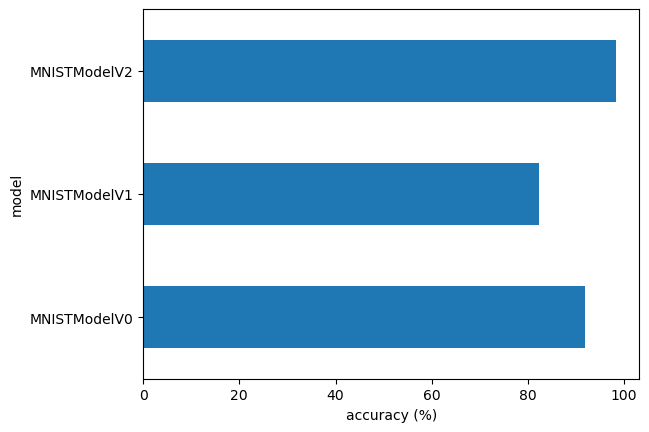

In [49]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [50]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [51]:
import random
random.seed(13)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (6 - six)


In [52]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[4.6092e-04, 2.6152e-07, 2.6644e-08, 1.8800e-07, 4.4743e-08, 9.2182e-03,
         9.9027e-01, 1.0501e-10, 4.7144e-05, 3.3274e-08],
        [6.4245e-03, 4.3869e-08, 9.6652e-07, 6.7763e-06, 2.3315e-06, 9.0932e-01,
         8.3707e-02, 2.4763e-10, 5.1615e-04, 2.0977e-05]])

In [53]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 5, 4, 1, 1, 1, 4, 2, 4])

In [54]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([6, 5, 4, 1, 1, 1, 4, 2, 4], tensor([6, 5, 4, 1, 1, 1, 4, 2, 4]))

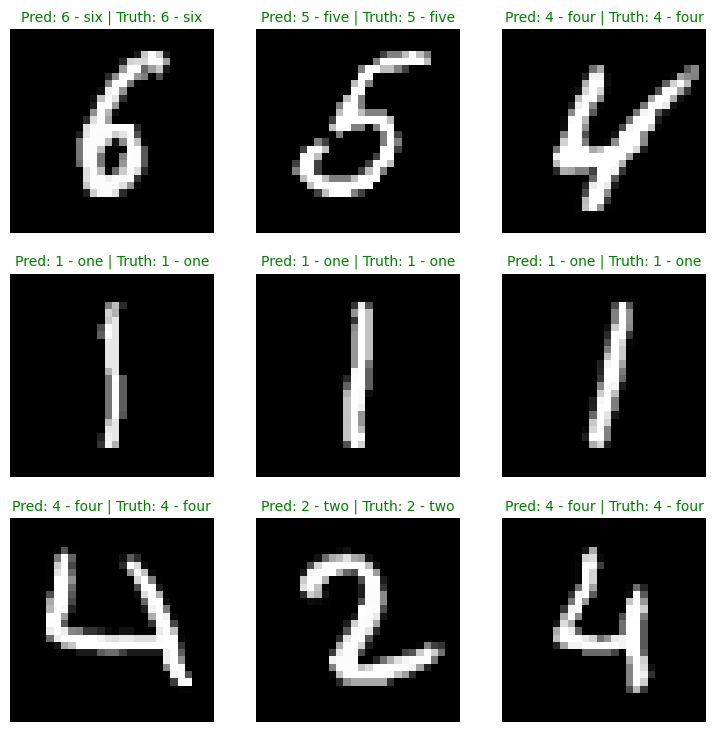

In [55]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [56]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 406.28it/s]


In [57]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [58]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


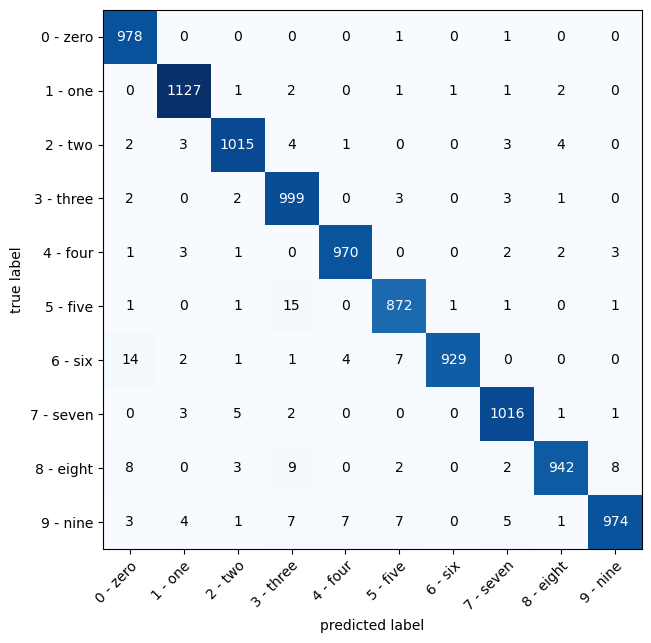

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [60]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "mnist_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/mnist_computer_vision_model_2.pth


In [61]:
# Create a new instance of MNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = MNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [62]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.05067199468612671,
 'model_acc': 98.22284345047923}

In [63]:
model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.05067199468612671,
 'model_acc': 98.22284345047923}

In [64]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)